In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Datos organizados por categorías
datos = {
    'MOD': {
        'Salarios directos': 40000,
        'Cargas sociales salarios directos': 25000
    },
    'CIF': {
        'Fuerza motriz': 5000,
        'Depreciación': 4000,
        'Seguros': 2000,
        'Sueldos y cargas sociales supervisores': 10000,
        'Útiles de escritorio': 1000,
        'Lubricantes': 3000,
        'Repuestos y herramientas': 7000,
        'Salarios indirectos y cargas sociales': 20000
    },
    'Otros': {
        'Unidades producidas': 9000
    }
}

In [4]:
def total_categoria(nombre_categoria):
    return sum(datos[nombre_categoria].values())

In [5]:
def detalle_categoria_df(nombre_categoria):
    df = pd.DataFrame(list(datos[nombre_categoria].items()), columns=['Concepto', 'Monto ($)'])
    total = df['Monto ($)'].sum()
    total_row = pd.DataFrame([{'Concepto': 'TOTAL ' + nombre_categoria, 'Monto ($)': total}])
    df = pd.concat([df, total_row], ignore_index=True)
    return df

In [6]:
# Cálculos
mod = total_categoria('MOD')
cif = total_categoria('CIF')
costo_primo_total = mod  # no hay Materia Prima
costo_conversion_total = mod + cif
costo_produccion_total = costo_conversion_total
unidades = datos['Otros']['Unidades producidas']
costo_unitario = costo_produccion_total / unidades if unidades != 0 else float('inf')

In [7]:
print("MOD detalle:")
for k,v in datos['MOD'].items():
    print(f"  {k}: ${v:,}")
print(f"MOD = {sum(datos['MOD'].values()):,}\n")

MOD detalle:
  Salarios directos: $40,000
  Cargas sociales salarios directos: $25,000
MOD = 65,000



In [8]:
print("CIF detalle:")
for k,v in datos['CIF'].items():
    print(f"  {k}: ${v:,}")
print(f"CIF = {sum(datos['CIF'].values()):,}\n")

CIF detalle:
  Fuerza motriz: $5,000
  Depreciación: $4,000
  Seguros: $2,000
  Sueldos y cargas sociales supervisores: $10,000
  Útiles de escritorio: $1,000
  Lubricantes: $3,000
  Repuestos y herramientas: $7,000
  Salarios indirectos y cargas sociales: $20,000
CIF = 52,000



In [9]:
print(f"Costo Primo = {costo_primo_total:,}")
print(f"Costo de Conversión = {costo_conversion_total:,}")
print(f"Costo de Producción = {costo_produccion_total:,}")
print(f"Costo unitario = ${costo_unitario:,.2f}\n")

Costo Primo = 65,000
Costo de Conversión = 117,000
Costo de Producción = 117,000
Costo unitario = $13.00



In [10]:
# DataFrames
df_mod = detalle_categoria_df('MOD')
df_cif = detalle_categoria_df('CIF')
df_resumen = pd.DataFrame({
    'Concepto': [
        'MOD', 'CIF', 'Costo Primo', 'Costo Conversión',
        'Costo Producción', 'Unidades', 'Costo Unitario'
    ],
    'Valor ($)': [mod, cif, costo_primo_total, costo_conversion_total, costo_produccion_total, unidades, round(costo_unitario,2)]
})

print(df_mod.to_string(index=False))
print(df_cif.to_string(index=False))
print(df_resumen.to_string(index=False))

                         Concepto  Monto ($)
                Salarios directos      40000
Cargas sociales salarios directos      25000
                        TOTAL MOD      65000
                              Concepto  Monto ($)
                         Fuerza motriz       5000
                          Depreciación       4000
                               Seguros       2000
Sueldos y cargas sociales supervisores      10000
                  Útiles de escritorio       1000
                           Lubricantes       3000
              Repuestos y herramientas       7000
 Salarios indirectos y cargas sociales      20000
                             TOTAL CIF      52000
        Concepto  Valor ($)
             MOD    65000.0
             CIF    52000.0
     Costo Primo    65000.0
Costo Conversión   117000.0
Costo Producción   117000.0
        Unidades     9000.0
  Costo Unitario       13.0


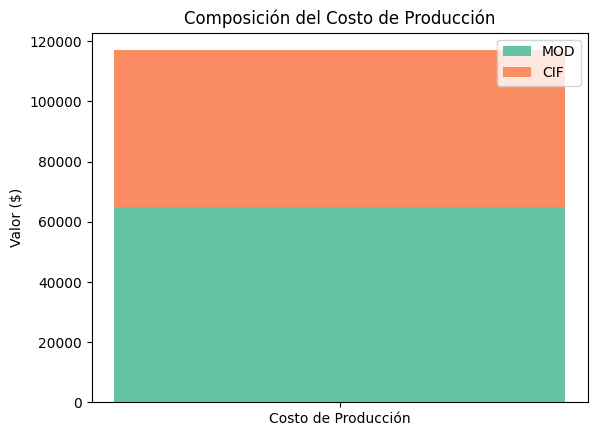

In [11]:
# Gráfico de barras apiladas
plt.figure()
# Para mostrar la contribución de MOD y CIF al costo total de producción
plt.bar(['Costo de Producción'], [mod], label='MOD', color=plt.cm.Set2.colors[0])
plt.bar(['Costo de Producción'], [cif], bottom=[mod], label='CIF', color=plt.cm.Set2.colors[1])
plt.ylabel('Valor ($)')
plt.title('Composición del Costo de Producción')
plt.legend()
plt.show()

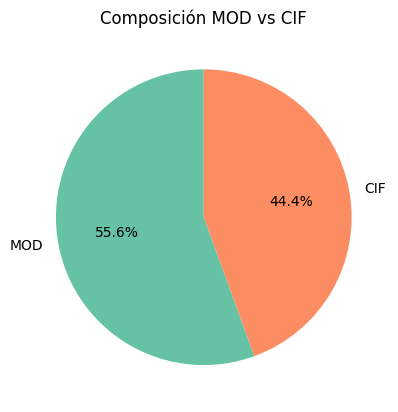

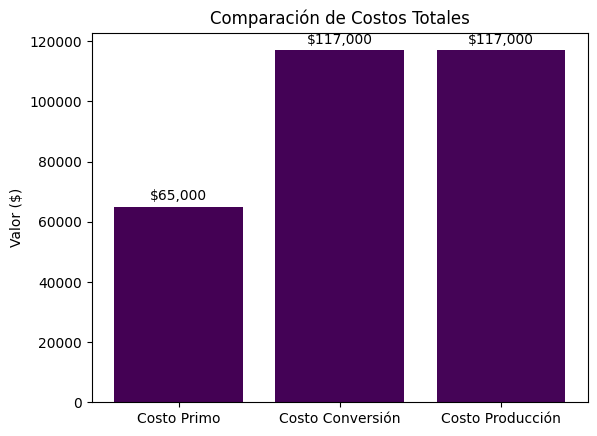

In [12]:
# Gráfico de pastel
plt.figure()
colors = plt.cm.Set2.colors
plt.pie([mod, cif], labels=['MOD','CIF'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Composición MOD vs CIF')
plt.show()

# Gráfico de barras
plt.figure()
colors = plt.cm.viridis(range(3))
plt.bar(['Costo Primo','Costo Conversión','Costo Producción'],
        [costo_primo_total, costo_conversion_total, costo_produccion_total],
        color=colors)
plt.title('Comparación de Costos Totales')
plt.ylabel('Valor ($)')
for i,val in enumerate([costo_primo_total, costo_conversion_total, costo_produccion_total]):
    plt.text(i, val + max(costo_conversion_total*0.01, 100), f'${val:,}', ha='center', va='bottom')
plt.show()

In [13]:
# Exportar a Excel
with pd.ExcelWriter('resultados_actividad_3_refactor.xlsx') as writer:
    df_mod.to_excel(writer, sheet_name='Detalle_MOD', index=False)
    df_cif.to_excel(writer, sheet_name='Detalle_CIF', index=False)
    df_resumen.to_excel(writer, sheet_name='Resumen', index=False)
print("Exportado a 'resultados_actividad_3_refactor.xlsx'")

Exportado a 'resultados_actividad_3_refactor.xlsx'
